## 1. load Packages

In [7]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
from matplotlib import rcParams

## 2. params

In [8]:
os.chdir("D:/Projects/CASH-Human/")
dir_for_NK_ldata = "./data/loom/ldata_sub/NK_ldata.h5ad"

## setup
scv.settings.verbosity = 0
sc.settings.verbosity = 0
### fig
sc.settings.set_figure_params(dpi = 100, dpi_save = 300, fontsize = 14, frameon = True,figsize = (8,8))
scv.settings.set_figure_params(dpi = 100, dpi_save = 300, fontsize = 14, frameon = None, figsize = (8,8)) 

## 3. load data

In [9]:
## load data
ldata = scv.read(os.path.join(dir_for_NK_ldata))
print("ldata:\n", ldata)
print("ldata_clusters:\n", pd.unique(ldata.obs["sub_celltype"]))

ldata:
 AnnData object with n_obs × n_vars = 2830 × 37487
    obs: 'patient', 'barcode', 'group', 'patient_id', 'sub_celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
ldata_clusters:
 ['c29_NK_NFKBIA', 'c28_NK_CD160', 'c32_NK_CREM', 'c33_NK_IL32', 'c30_NK_DNAJB1', 'c34_NK_CX3CR1', 'c31_NK_CCL4']
Categories (7, object): ['c28_NK_CD160', 'c29_NK_NFKBIA', 'c30_NK_DNAJB1', 'c31_NK_CCL4', 'c32_NK_CREM', 'c33_NK_IL32', 'c34_NK_CX3CR1']


In [10]:
# cluster_group = ["c28_NK_CD160", "c29_NK_NFKBIA", "c30_NK_DNAJB1", "c31_NK_CCL4"]
cluster_group = ["c32_NK_CREM", "c33_NK_IL32", "c34_NK_CX3CR1"]
ldata = ldata[ldata.obs["sub_celltype"].isin(cluster_group)]
# ldata = ldata[ldata.obs["sub_celltype"].isin(cluster_group)]
print("ldata_sub:\n", ldata)
print("ldata_sub_clusters:\n", pd.unique(ldata.obs["sub_celltype"]))

ldata_sub:
 View of AnnData object with n_obs × n_vars = 1243 × 37487
    obs: 'patient', 'barcode', 'group', 'patient_id', 'sub_celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
ldata_sub_clusters:
 ['c32_NK_CREM', 'c33_NK_IL32', 'c34_NK_CX3CR1']
Categories (3, object): ['c32_NK_CREM', 'c33_NK_IL32', 'c34_NK_CX3CR1']


In [11]:
## preprocess
sc.pp.pca(ldata)
sc.pp.neighbors(ldata, n_pcs = 50, n_neighbors = 30)

In [12]:
# ## setup
# root_cells = ldata.obs_names[ldata.obs["sub_celltype"] == "c29_NK_NFKBIA"]
# root_id = ldata.obs_names.get_indexer([root_cells[0]])[0]
# ldata.uns["root"] = root_id
# sc.tl.dpt(ldata)

# scv.tl.recover_dynamics(ldata, n_jobs=14)
# scv.tl.latent_time(ldata, root_key='root')

d:\software\anaconda3\Lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
d:\software\anaconda3\Lib\site-packages\scvelo\tools\optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


  0%|          | 0/1243 [00:00<?, ?cells/s]

d:\software\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
d:\software\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categor

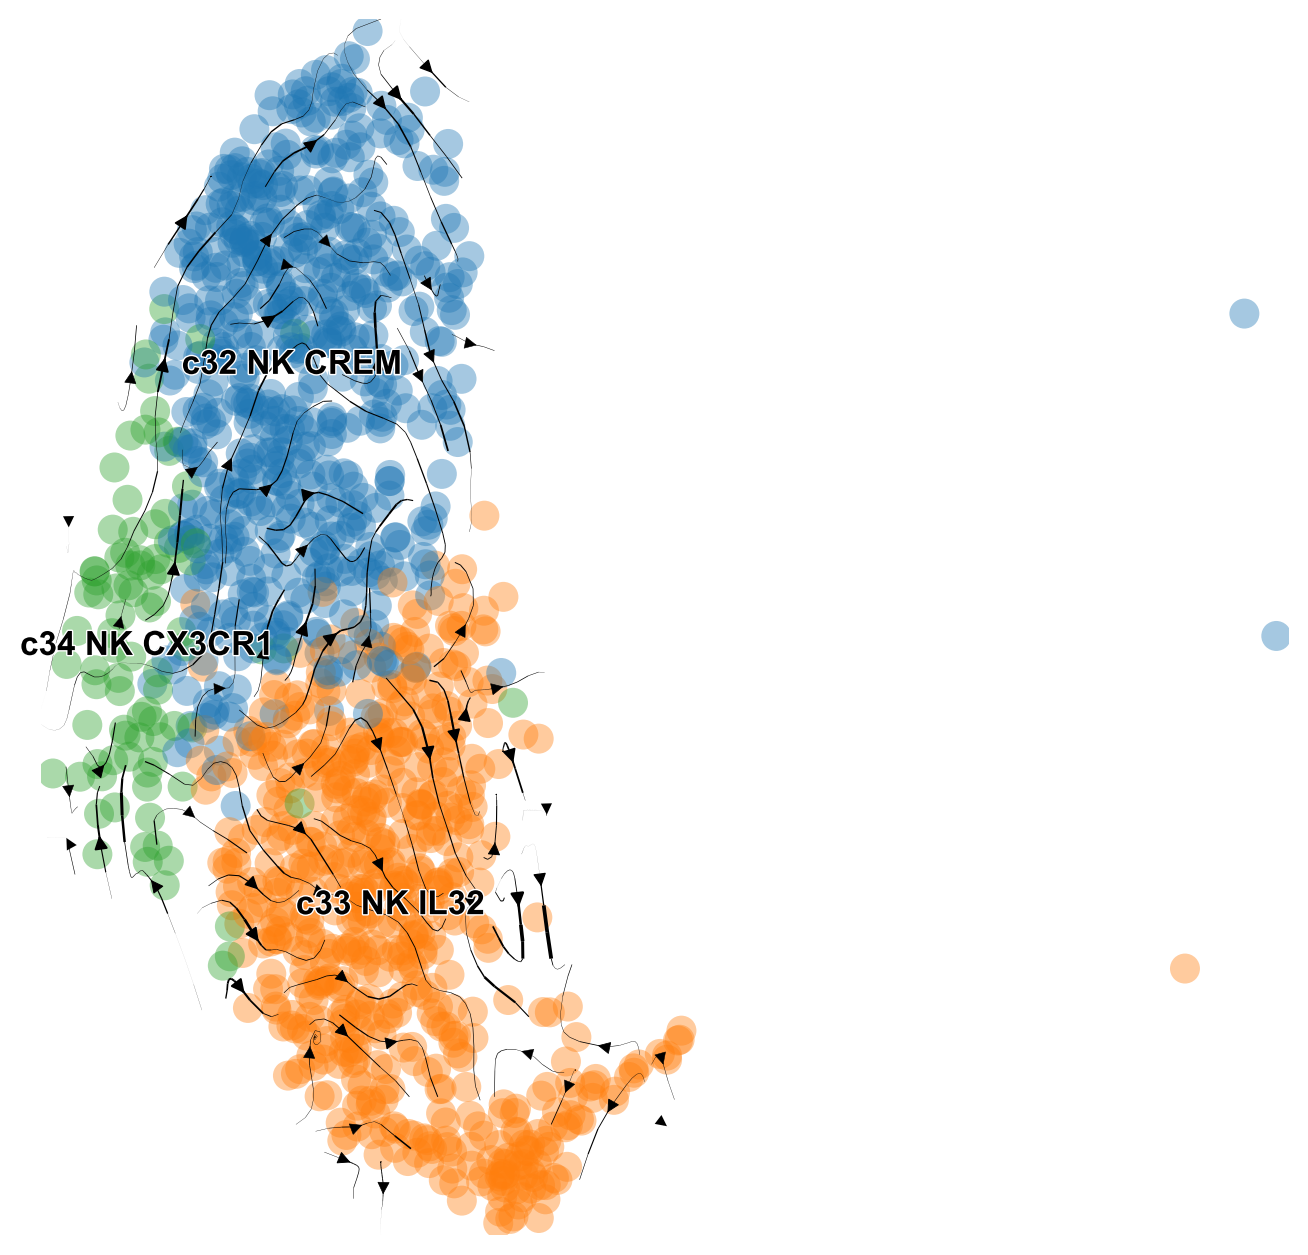

In [13]:
# sc.pl.umap(ldata, color = "sub_celltype", frameon = False, legend_loc = "right margin")

## compute
scv.pp.filter_and_normalize(ldata)
scv.pp.moments(ldata)

scv.tl.velocity(ldata, group_by = 'sub_celltype')

scv.tl.velocity_graph(ldata)

## plot
scv.pl.velocity_embedding_stream(ldata, 
                                 basis = "X_umap", 
                                 color = "sub_celltype",
                                 title = "",
                                 ## legend
                                 legend_fontsize=12,
                                #  legend_loc = "right margin",
                                 ## save
                                #  save = "./fig/Fig03.NK/scVelocity_c29-c31_NK.pdf",
                                save = "./fig/Fig03.NK/scVelocity_c32-c34_NK.pdf",
                                 density = 1.5, alpha=0.4,linewidth=0.8)